##**MTBF Predictive Maintenance**
#Autor: Juan Diaz


#Importing Packages For ML Predictive Analysis
the objective of this project is to determinate the time [MIN] before the next machine failure



In [ ]:
#code snippet #1
#installing dython for correlation analysis
!pip install dython

#installing pycaret to AI/ML model test
!pip install git+https://github.com/pycaret/pycaret.git


#importing tools for data analisys
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




  Using cached numpy-2.3.4-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.3.3-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached scipy-1.16.3-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.7-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scikit_learn-1.7.2-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
Using cached matplotlib-3.10.7-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
Using cached numpy-2.3.4-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.9 MB)
Using cached pandas-2.3.3-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (12.8 MB)
Using cached scikit_learn-1.7.2-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.7 MB)
Using cached scipy-1.16.3-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_

  Cloning https://github.com/pycaret/pycaret.git to /tmp/pip-req-build-tm7ybexh
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-tm7ybexh
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached matplotlib-3.7.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.7 kB)
Using cached matplotlib-3.7.5-c

#Importing DataSet For ML Predictive Analysis

In [ ]:
#code snippet 2
#reading and displaying data with pandas
data = pd.read_csv ('https://raw.githubusercontent.com/Imjuandiaz/MTTF-Predictive-Maintenance-analysis/refs/heads/main/Data/ai4i2020.csv')

data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


#Data Info


In [ ]:
#code snippet 3
#show data columns
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [ ]:
#code snippet 3.5
#displaying data type
data.dtypes

,0
UDI,int64
Product ID,object
Type,object
Air temperature [K],float64
Process temperature [K],float64
Rotational speed [rpm],int64
Torque [Nm],float64
Tool wear [min],int64
Machine failure,int64
TWF,int64


#Proportion of Missing Value In the Data

<Axes: >

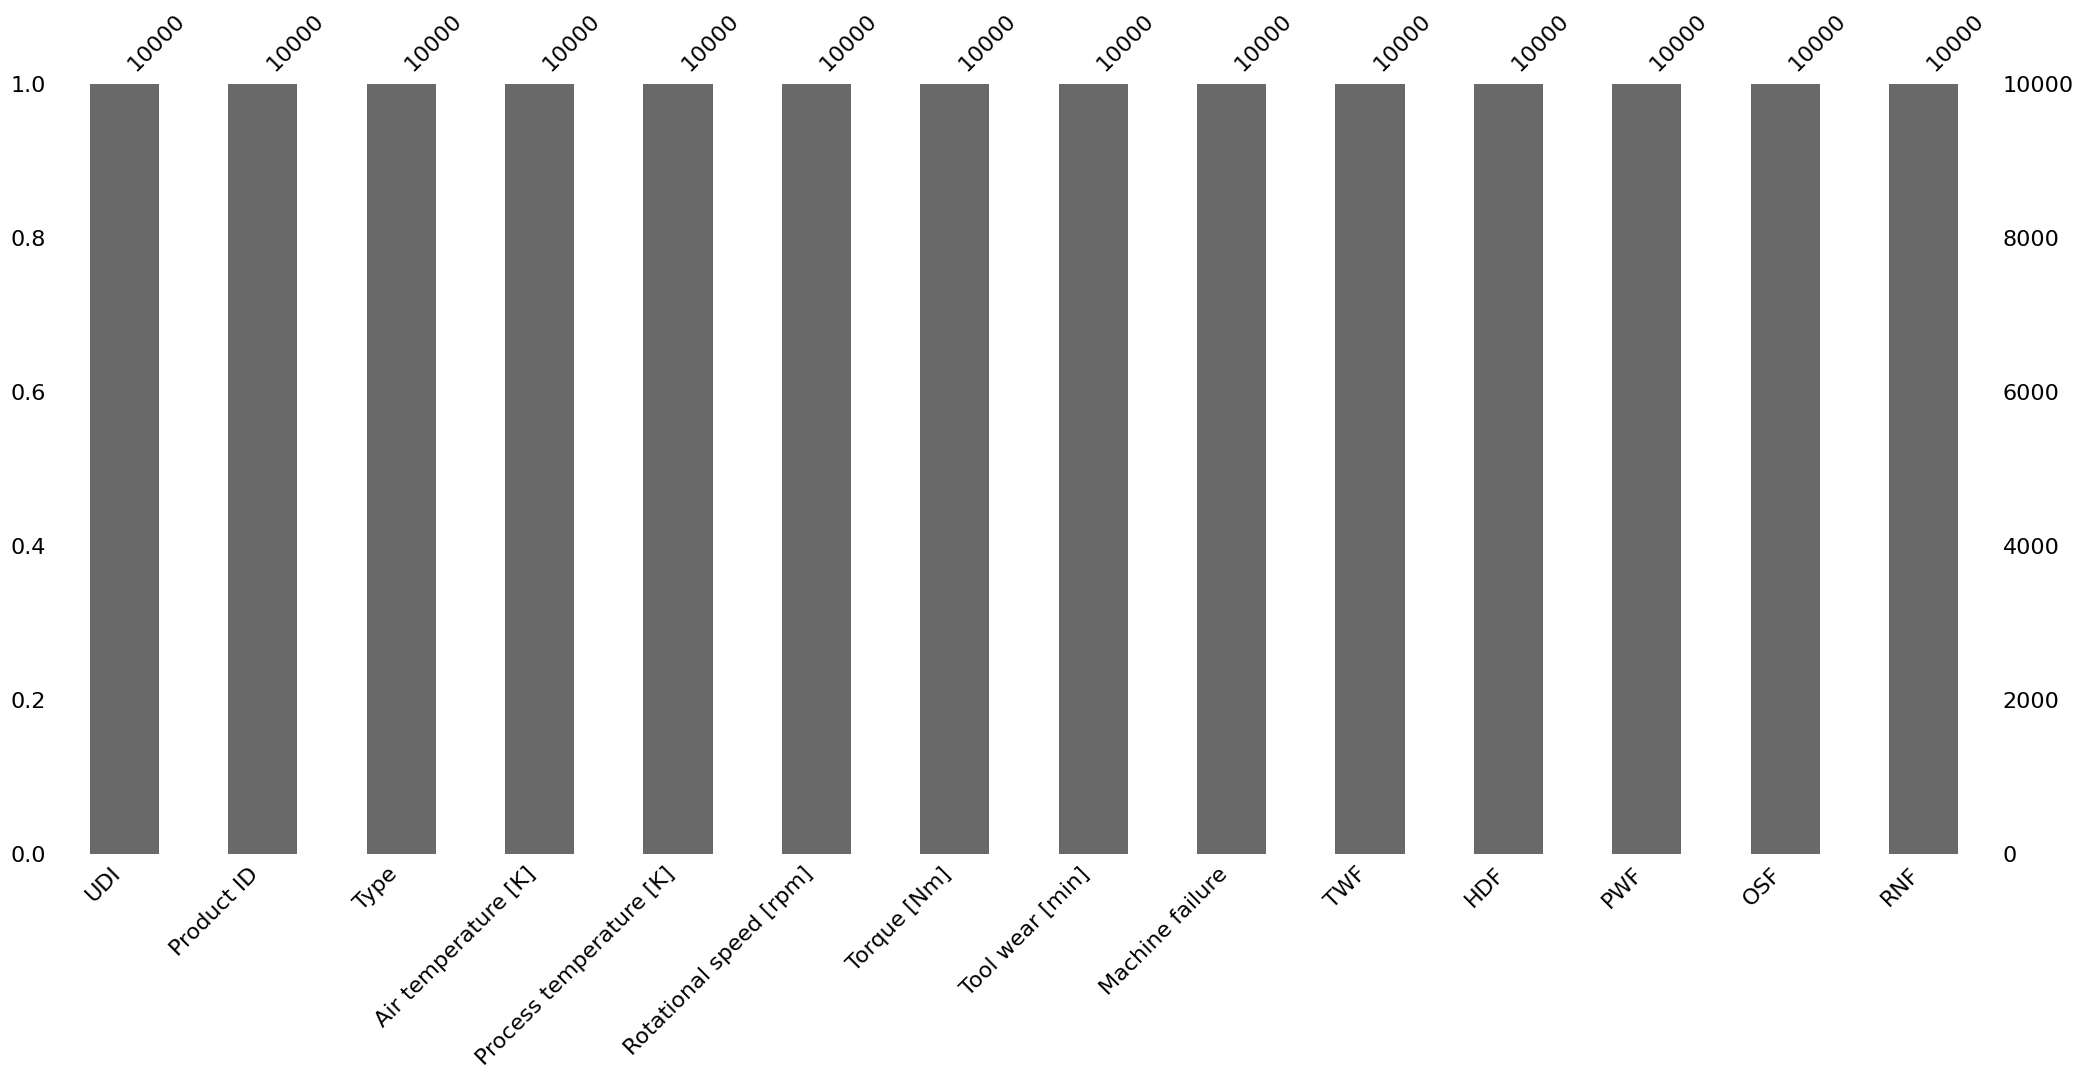

In [ ]:
#code snippet 4
#displaying the proportion of missing data in the dataset
msno.bar(data)

#Statistical Analysis

In [ ]:
#code snippet 5
#displaying statistical analisys
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


#HeatMap Correlation Analysis With Dython

/usr/local/lib/python3.11/dist-packages/dython/nominal.py:166: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(


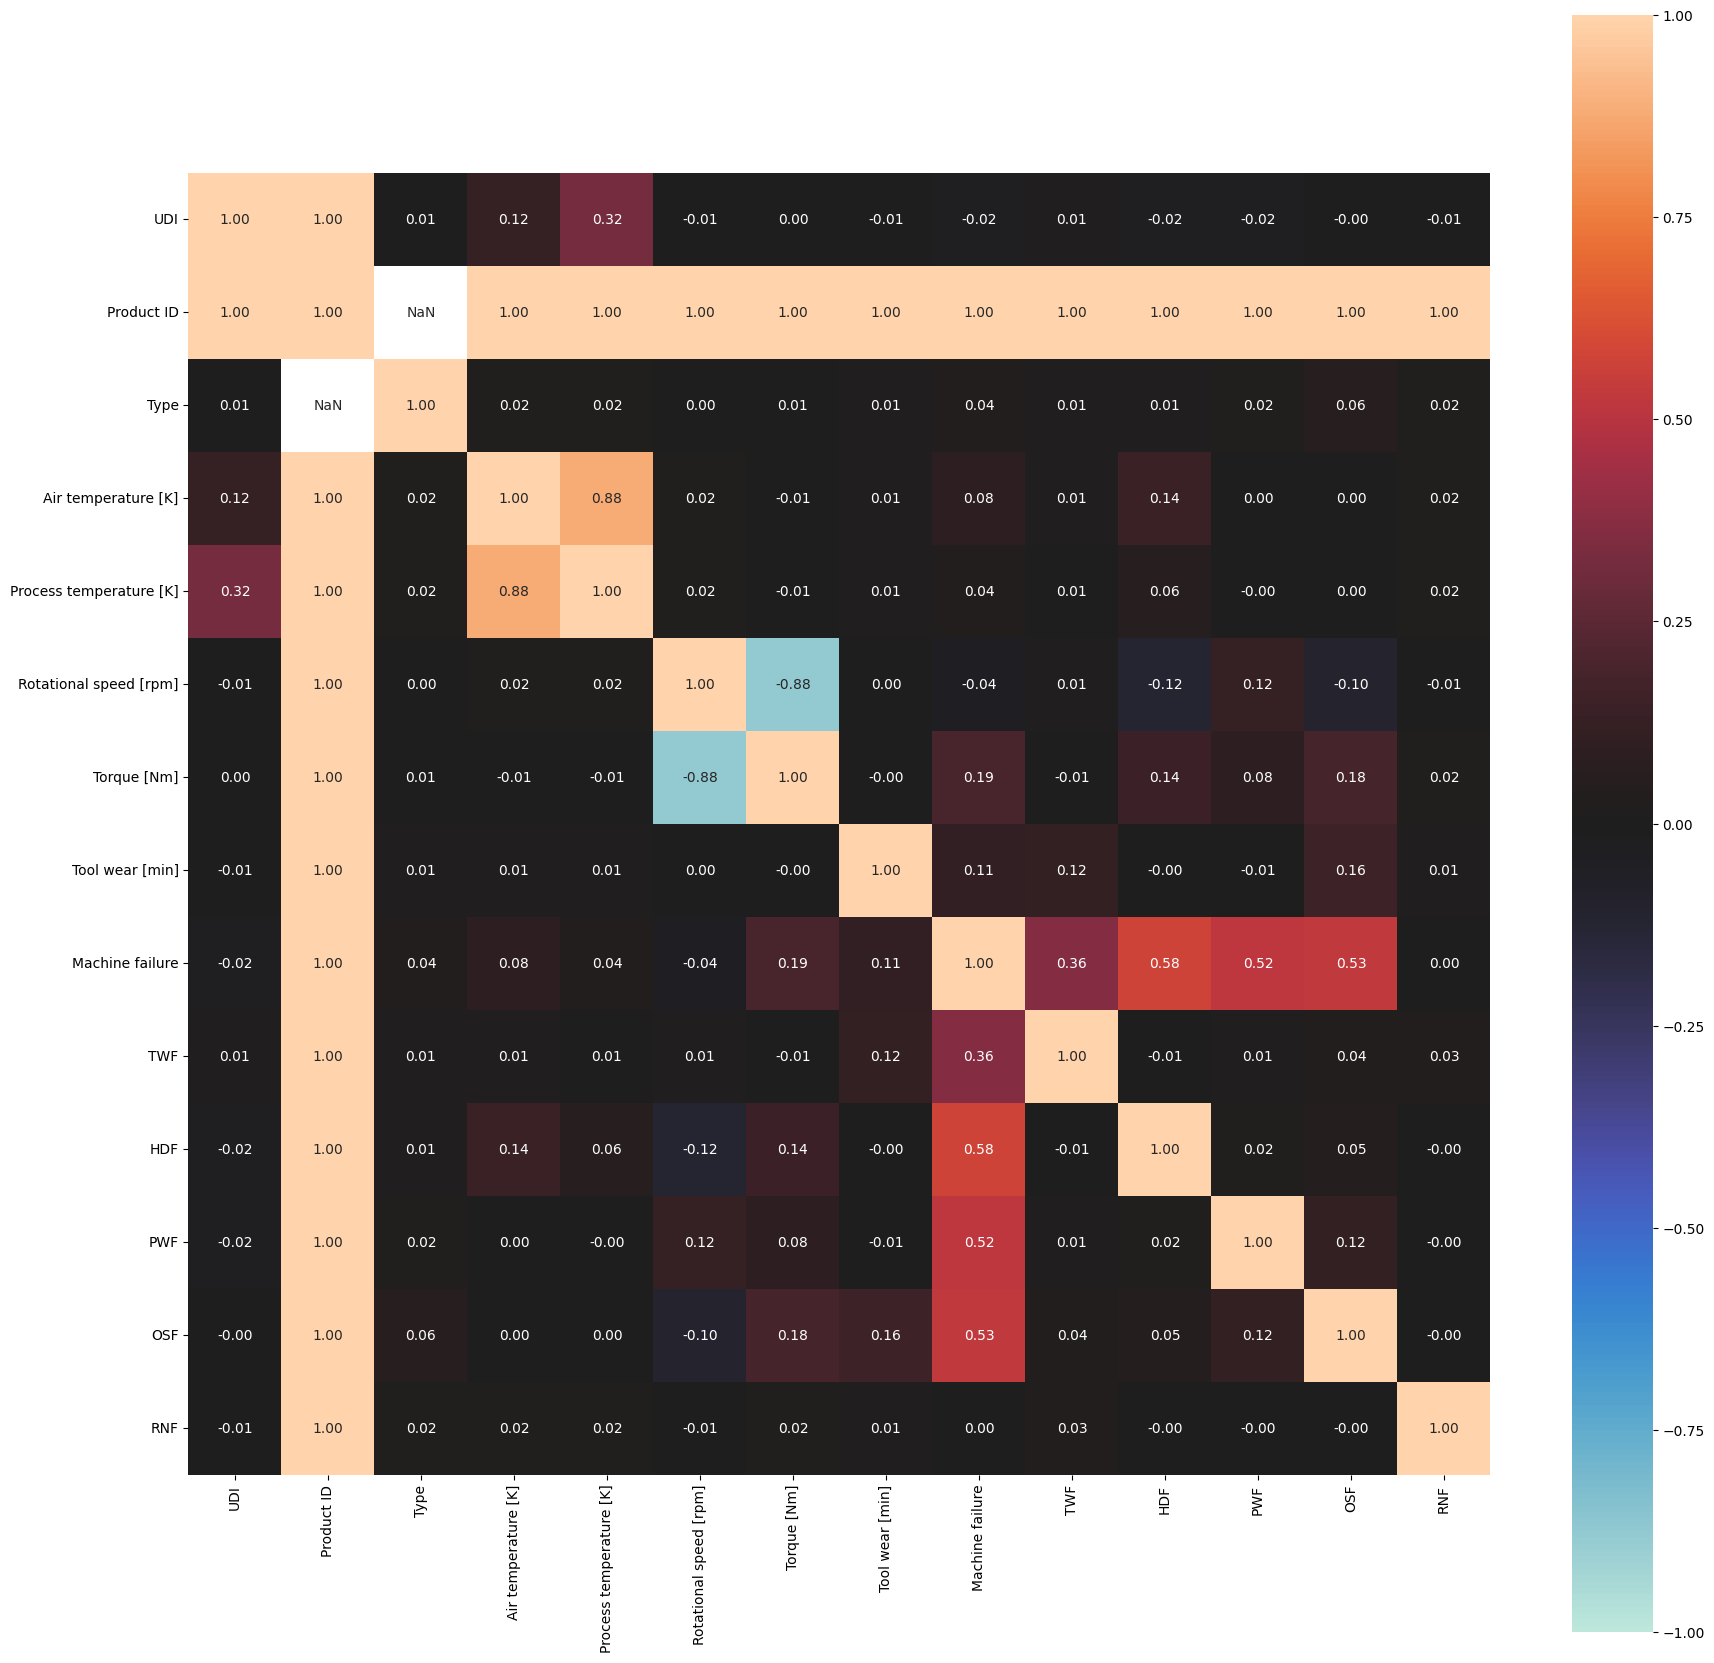

In [ ]:
#code snippet 6
#import dython for correlacion analisys
import dython
from dython.nominal import associations
corr = associations(data)

In [ ]:
#code snippet 7
# Storing the correlations in a matrix
assoc_matrix = corr['corr']

#Setting the target variable DonorIndicator
target = 'Machine failure'

# List the associated variables in the descending order of influence on the target variable
assoc_matrix[target].abs().sort_values(ascending=False)

,Machine failure
Product ID,1.000000
Machine failure,1.000000
HDF,0.575800
OSF,0.531083
PWF,0.522812
TWF,0.362904
Torque [Nm],0.191321
Tool wear [min],0.105448
Air temperature [K],0.082556
Rotational speed [rpm],0.044188


#Featuring Engeenering

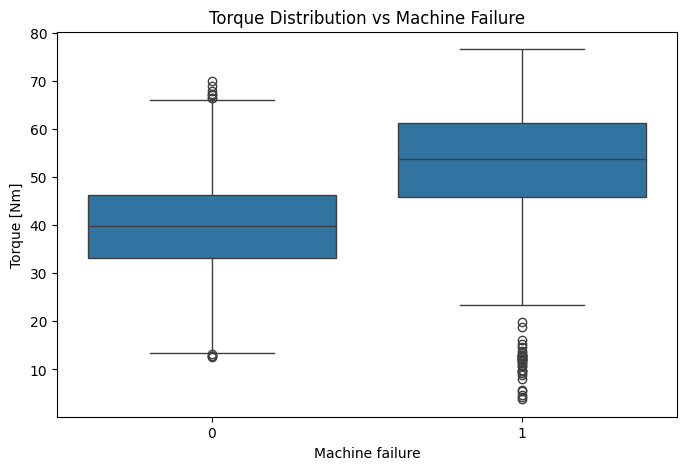

In [ ]:
#CodeSnippet 8
# Torque distribution depending on failure
plt.figure(figsize=(8,5))
sns.boxplot(x='Machine failure', y='Torque [Nm]', data=data)
plt.title('Torque Distribution vs Machine Failure')
plt.show()


In [ ]:
#CodeSnippet 9
# Creating new derived features
data['Temp_diff'] = data['Process temperature [K]'] - data['Air temperature [K]']
data['Wear_per_torque'] = data['Tool wear [min]'] / data['Torque [Nm]']

# Displaying first rows of engineered features
data[['Temp_diff', 'Wear_per_torque']].head()

,Temp_diff,Wear_per_torque
0,10.5,0.000000
1,10.5,0.064795
2,10.4,0.101215
3,10.4,0.177215
4,10.5,0.225000


#Pycaret For ML Model Testing

In [ ]:
#code snippet 11
#setting up the Regression ML model
from pycaret.regression import *


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7c9efc203ba0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


In [ ]:
#code snippet 12
#name of columns for AI/ML
data.dtypes

,0
UDI,int64
Product ID,object
Type,object
Air temperature [K],float64
Process temperature [K],float64
Rotational speed [rpm],int64
Torque [Nm],float64
Tool wear [min],int64
Machine failure,int64
TWF,int64


In [ ]:
# Code snippet 17
# Setting the target variable
y = 'Tool wear [min]'

In [ ]:
# Code snippet 18
# Setting the ignored variables(noise variables, redundant variables,  variables that are missing more than 20% data etc)
ignored_cols = ['Product ID','Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF','UDI'
        ]

In [ ]:
# Code snippet 19
# Setting the numerical variables
num_cols = [ 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Temp_diff', 'Wear_per_torque' ]

In [ ]:
# Code snippet 20
# Setting the categorical variables
cat_cols = [ 'Type', ]

In [ ]:
#CodeSnippet 21
# Setting up/configuring the pycaret setup for Regression ML modeling
from pycaret.regression import *

reg_setup = setup(
    data = data,
    target = y,        # o 'RUL_min' si implementas el target de tiempo restante
    train_size = 0.7,
    fold=10,
    ignore_features = ignored_cols,
    numeric_features = num_cols,
    categorical_features = cat_cols,
    verbose=False
)




In [ ]:
# Code snippet 21
# Setting up/configuring the pycaret setup for Regression ML modeling
#Regression_setup = setup(data,
                       # target = y,
                        #ignore_features = ignored_cols,
                        #categorical_features = cat_cols,
                        #numeric_features = num_cols, train_size = 0.7)



#Compare ML Model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.9494,5.4348,2.3046,0.9987,0.0266,0.0122,2.7750
et,Extra Trees Regressor,0.9550,5.6966,2.3349,0.9986,0.0401,0.0126,1.7170
lightgbm,Light Gradient Boosting Machine,1.3542,6.7146,2.5521,0.9984,0.0523,0.0194,0.4200
xgboost,Extreme Gradient Boosting,1.6195,8.4723,2.8756,0.9979,0.0741,0.0238,0.2830
dt,Decision Tree Regressor,2.2501,17.4836,4.1532,0.9957,0.0463,0.0259,0.0890
gbr,Gradient Boosting Regressor,2.4788,14.3068,3.7705,0.9965,0.1496,0.0433,0.9660
ada,AdaBoost Regressor,11.8524,217.7617,14.7310,0.9466,0.4113,0.2624,0.5860
huber,Huber Regressor,14.0425,943.9731,29.2762,0.7690,0.5282,0.4239,0.1180
lar,Least Angle Regression,16.4356,724.1876,26.1658,0.8226,0.5897,0.5418,0.0550
lr,Linear Regression,16.6455,730.4066,26.3124,0.8211,0.5949,0.5490,0.9330


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

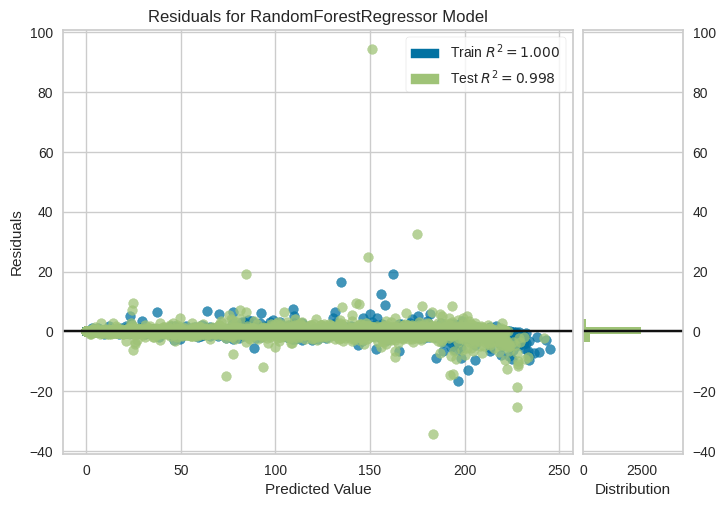

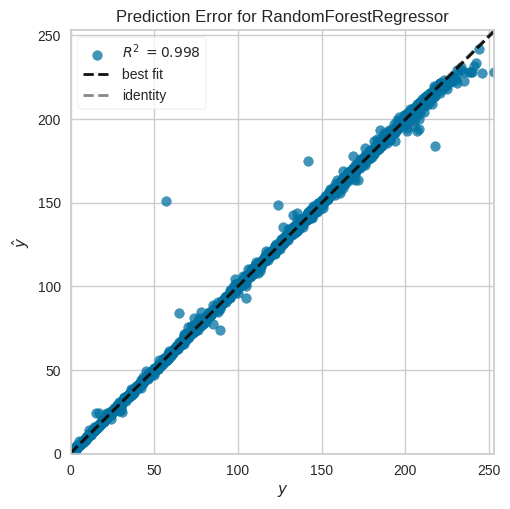

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Air temperature [K]',
                                              'Process temperature [K]',
                                              'Rotational speed [rpm]',
                                              'Torque [Nm]', 'Temp_diff',
                                              'Wear_per_torque'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Type'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Type'],
                                     transformer=OneHotEncoder(cols=['Type'],
                                                               handle_missing='return_nan',
                                                 

In [ ]:
#code snippet 22
# Running pycaret to invoke ML algorithms
best = compare_models(sort='MAE')         # ExtraTrees/LightGBM suelen ser top
plot_model(best, plot='residuals')
plot_model(best, plot='error')
final_reg = finalize_model(best)
save_model(final_reg, 'model_time_pycaret')

#Predictions Dataset For Predictive Maintenance

In [ ]:
# Code snippet 23
# Predicting 'eBook Subscriber Flag' on a dataset
predictions = predict_model(best, data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.5160,2.4705,1.5718,0.9994,0.0188,0.0067


In [ ]:
# Code snippet 24
# Exporting predictions to a csv file
predictions.to_csv('Prediction maintenance predictions.csv')

#ML with Sklearn


In [ ]:
# CodeSnippet 25
# Selecting independent variables (features)
features = ['Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]',
            'Temp_diff', 'Wear_per_torque']

X = data[features]
y = data['Tool wear [min]']


In [ ]:
# CodeSnippet 26
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Split 70/30 as in PyCaret
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42
)

# Numeric and categorical columns
num_cols = ['Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]',
            'Temp_diff', 'Wear_per_torque']


# Column transformer for preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


In [ ]:
#CodeSnippet 27 (Optimized RandomForest)
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Build optimized pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=120,
        max_depth=12,
        min_samples_leaf=4,
        random_state=42,
        n_jobs=-1
    ))
])

# 10-Fold Cross Validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_pipeline, X_train, y_train,
                            cv=cv, scoring='neg_mean_absolute_error')

print(f"✅ Cross-validation MAE: {abs(cv_scores.mean()):.3f} ± {cv_scores.std():.3f}")



✅ Cross-validation MAE: 1.046 ± 0.108


In [ ]:
# CodeSnippet 28
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train final model
rf_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = rf_pipeline.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"✅ Test MAE:  {mae:.3f}")
print(f"✅ Test RMSE: {rmse:.3f}")
print(f"✅ Test R²:   {r2:.3f}")


✅ Test MAE:  0.990
✅ Test RMSE: 2.462
✅ Test R²:   0.999


In [ ]:
# CodeSnippet 29
import pandas as pd

# Extract trained model
rf_model = rf_pipeline.named_steps['model']

# Get processed feature names
encoded_num = preprocessor.named_transformers_['num'].get_feature_names_out(num_cols)
# Get encoded categorical feature names
feature_names = list(encoded_num)


# Feature importances
importances = pd.Series(rf_model.feature_importances_, index=feature_names)
importances = importances.sort_values(ascending=False)

print("📊 Top 10 Feature Importances:")
print(importances.head(10))

📊 Top 10 Feature Importances:
Wear_per_torque            0.895593
Torque [Nm]                0.098289
Rotational speed [rpm]     0.005808
Temp_diff                  0.000137
Process temperature [K]    0.000099
Air temperature [K]        0.000074
dtype: float64


In [ ]:
#CodeSnippet 30
import joblib, json
from pathlib import Path

ARTIFACTS_DIR = Path("artifacts")
ARTIFACTS_DIR.mkdir(exist_ok=True)

# 1️⃣ Save trained model with compression (native, no lz4)
joblib.dump(rf_pipeline, ARTIFACTS_DIR / "model_mtbf_randomforest.pkl", compress=('zlib', 3))

# 2️⃣ Save feature list
with open(ARTIFACTS_DIR / "features_mtbf.json", "w") as f:
    json.dump(features, f)

# 3️⃣ Save feature importances
importances.to_csv(ARTIFACTS_DIR / "feature_importances_mtbf.csv", header=["importance"])

print("✅ Artifacts saved in ./artifacts:")
print("   - model_mtbf_randomforest.pkl (compressed)")
print("   - features_mtbf.json")
print("   - feature_importances_mtbf.csv")


✅ Artifacts saved in ./artifacts:
   - model_mtbf_randomforest.pkl (compressed)
   - features_mtbf.json
   - feature_importances_mtbf.csv
